# <div align='center'> __Remaining Useful Life (RUL)__

# Physics-Based Approach (For accurate model and data availability) <br>
- Degradation model describing the level of damage is  $z(t;\theta) = \theta_{1}+\theta_{2}Lt^{2}+\theta_{3}t^{3}$ <br>
- Here, $\theta$= ${\begin{bmatrix}\theta_{1} & \theta_{2} & \theta_{3}\end{bmatrix}}$ $^T $ <br>
- t = Time cycle <br>
- L = Load condition <br>
- z(t; $\theta$) = Degradation level <br>


# __Case 1:__ Noise free degradation data

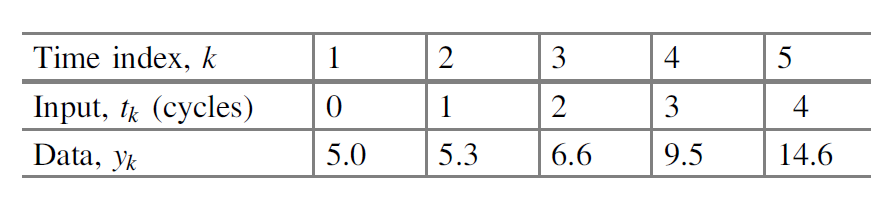

In [1]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
from sympy import solve, symbols, N
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures


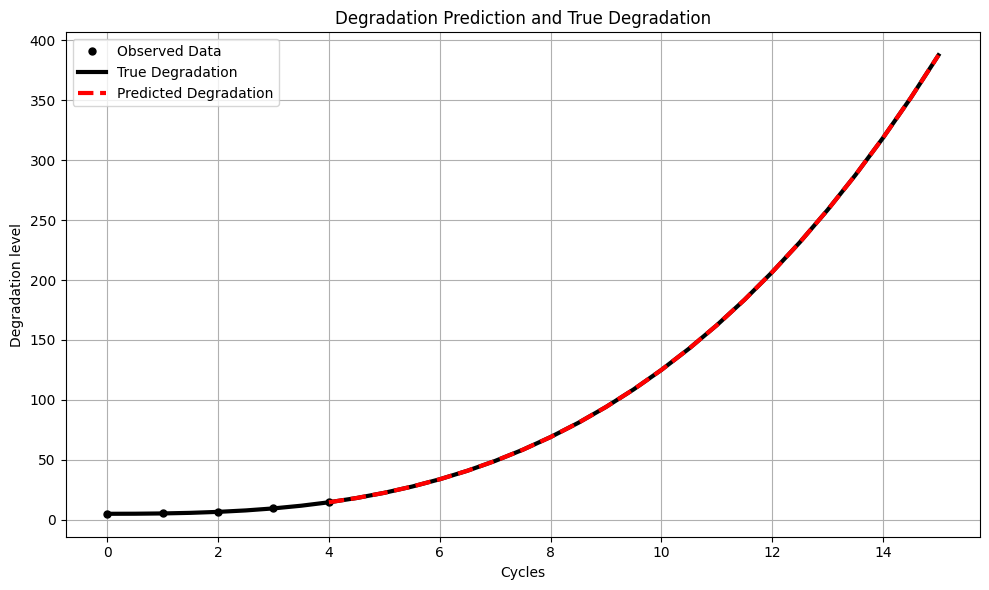

In [2]:
# Defining the functions

# Design matrix
def design_matrix(x, L=1):
    return np.column_stack((np.ones(len(x)), L * x**2, x**3))

def predicted_values(x, theta):
    X = design_matrix(x)
    return X @ theta

def true_values(x, theta):
    X = design_matrix(x)
    return X @ theta

# Observed data
x_observed = np.array([0, 1, 2, 3, 4])
y_observed = np.array([5, 5.3, 6.6, 9.5, 14.6])

# True parameters and true data
theta_true = np.array([5, 0.2, 0.1])
x_true = np.arange(0, 15.5, 0.5)

# Estimated parameters and prediction
theta_estimated = np.linalg.lstsq(design_matrix(x_observed), y_observed, rcond=None)[0]
x_new = np.arange(4, 15.5, 0.5)

# Plotting the data and the predictions
plt.figure(figsize=(10, 6))
plt.plot(x_observed, y_observed, '.k', markersize=10, label='Observed Data')
plt.plot(x_true, true_values(x_true, theta_true), 'k', linewidth=3, label='True Degradation')
plt.plot(x_new, predicted_values(x_new, theta_estimated), '--r', linewidth=3, label='Predicted Degradation')
plt.xlabel('Cycles')
plt.ylabel('Degradation level')
plt.title('Degradation Prediction and True Degradation')
plt.legend(loc='upper left')
plt.grid(True)
plt.tight_layout()

# # Customizing the plot
# plt.style.use('seaborn-pastel')
# plt.axhline(0, color='gray', linewidth=0.8, linestyle='--')
# plt.axvline(4, color='gray', linewidth=0.8, linestyle='--')
# plt.axvline(15, color='gray', linewidth=0.8, linestyle='--')

plt.show()


In [4]:
def calculate_eol(thres, Theta):
    L = 1
    xEOL = symbols('xEOL')
    XEOL = np.array([1, L * xEOL**2, xEOL**3])
    eolFuc = thres - np.dot(XEOL, Theta)  # EOL func.

    # Solving the equation for 'xEOL' symbolically
    eol_solutions = solve(eolFuc, xEOL, real=True)

    # Convert the solutions to floating-point numbers
    eol = [N(sol) for sol in eol_solutions if sol.is_real]

    return eol


In [5]:
thres = 150
eol_values = calculate_eol(thres, theta_estimated)
print("The End of life is:", eol_values)

valid_solutions = [sol for sol in eol_values if sol >= 0]

currt = 4
while True:
    # Find the minimum positive RUL
    rul = min(valid_solutions) - currt

    print("Predicted RUL:", rul)

    # Check if RUL is zero or negative
    if rul <= 0:
        break

    # Update 'currt' for the next iteration
    currt += 1

The End of life is: [10.6895754146539]
Predicted RUL: 6.68957541465388
Predicted RUL: 5.68957541465388
Predicted RUL: 4.68957541465388
Predicted RUL: 3.68957541465388
Predicted RUL: 2.68957541465388
Predicted RUL: 1.68957541465388
Predicted RUL: 0.689575414653881
Predicted RUL: -0.310424585346119


# __Case 2:__ Effect of Noise in data (Measurement error)

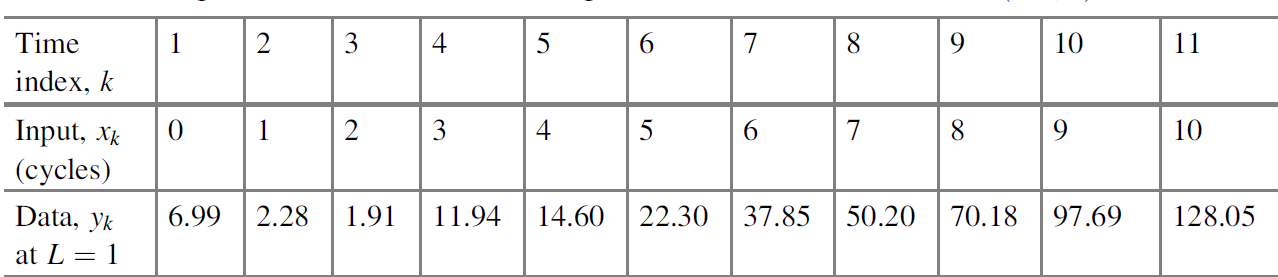

### (a) Minimal data availability

The estimated Theta is: [ 4.27746812 -0.28698289  0.24942146]


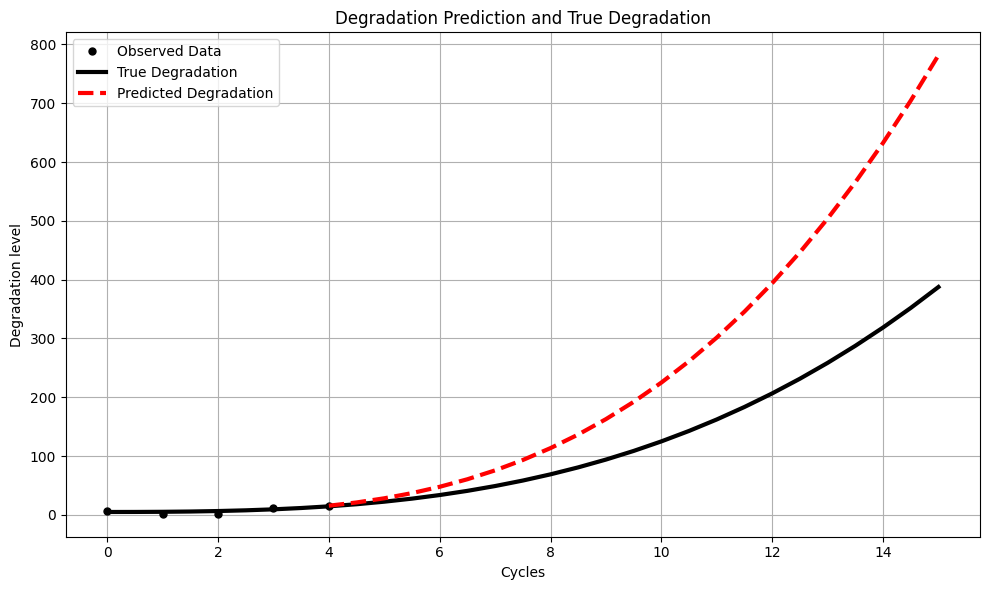

In [6]:
# Observed data
x_observed_1 = np.array([0, 1, 2, 3, 4])
y_observed_1 = np.array([6.99, 2.28, 1.91, 11.94, 14.60 ])

# Estimated parameters and prediction
theta_estimated_1 = np.linalg.lstsq(design_matrix(x_observed_1), y_observed_1, rcond=None)[0]
print("The estimated Theta is:", theta_estimated_1)
x_new = np.arange(4, 15.5, 0.5)

# Plotting the data and the predictions
plt.figure(figsize=(10, 6))
plt.plot(x_observed_1, y_observed_1, '.k', markersize=10, label='Observed Data')
plt.plot(x_true, true_values(x_true, theta_true), 'k', linewidth=3, label='True Degradation')
plt.plot(x_new, predicted_values(x_new, theta_estimated_1), '--r', linewidth=3, label='Predicted Degradation')
plt.xlabel('Cycles')
plt.ylabel('Degradation level')
plt.title('Degradation Prediction and True Degradation')
plt.legend(loc='upper left')
plt.grid(True)
plt.tight_layout()

# # Customizing the plot
# plt.style.use('seaborn-pastel')
# plt.axhline(0, color='gray', linewidth=0.8, linestyle='--')
# plt.axvline(4, color='gray', linewidth=0.8, linestyle='--')
# plt.axvline(15, color='gray', linewidth=0.8, linestyle='--')

plt.show()


In [7]:
thres = 150
eol_values = calculate_eol(thres, theta_estimated_1)
print("The End of life is:", eol_values)

valid_solutions = [sol for sol in eol_values if sol >= 0]

currt = 4
while True:
    # Find the minimum positive RUL
    rul = min(valid_solutions) - currt

    print("Predicted RUL:", rul)

    # Check if RUL is zero or negative
    if rul <= 0:
        break

    # Update 'currt' for the next iteration
    currt += 1

The End of life is: [8.76149751529890]
Predicted RUL: 4.76149751529890
Predicted RUL: 3.76149751529890
Predicted RUL: 2.76149751529890
Predicted RUL: 1.76149751529890
Predicted RUL: 0.761497515298899
Predicted RUL: -0.238502484701101


### (b) Moderate data availability

The estimated Theta is: [3.45817707 0.4230674  0.07779372]


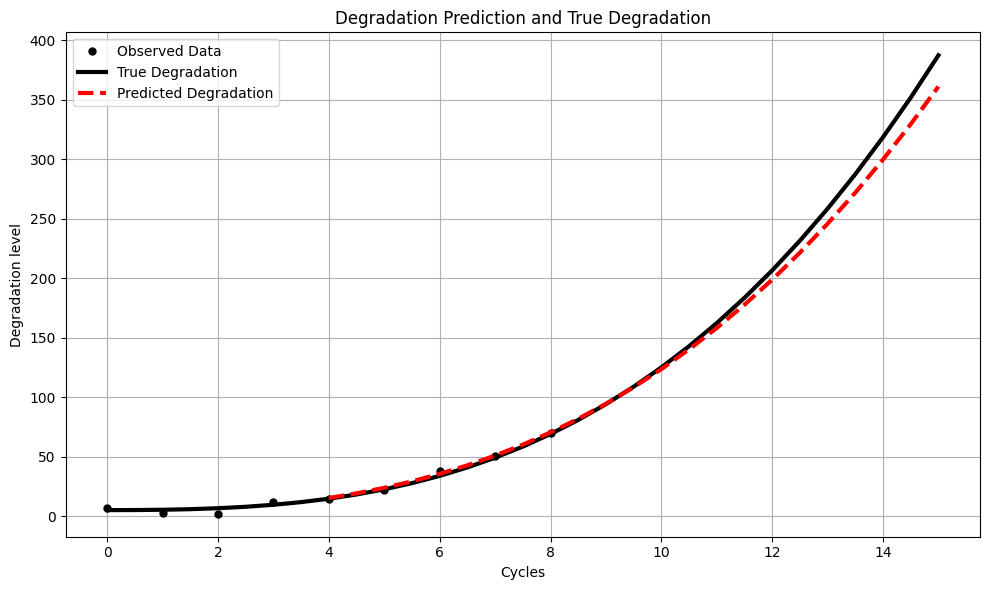

In [9]:
# Observed data
x_observed_2 = np.array([0, 1, 2, 3, 4, 5, 6, 7, 8])
y_observed_2 = np.array([6.99, 2.28, 1.91, 11.94, 14.60, 22.30, 37.85, 50.20, 70.18 ])

# Estimated parameters and prediction
theta_estimated_2 = np.linalg.lstsq(design_matrix(x_observed_2), y_observed_2, rcond=None)[0]
print("The estimated Theta is:", theta_estimated_2)
x_new = np.arange(4, 15.5, 0.5)

# Plotting the data and the predictions
plt.figure(figsize=(10, 6))
plt.plot(x_observed_2, y_observed_2, '.k', markersize=10, label='Observed Data')
plt.plot(x_true, true_values(x_true, theta_true), 'k', linewidth=3, label='True Degradation')
plt.plot(x_new, predicted_values(x_new, theta_estimated_2), '--r', linewidth=3, label='Predicted Degradation')
plt.xlabel('Cycles')
plt.ylabel('Degradation level')
plt.title('Degradation Prediction and True Degradation')
plt.legend(loc='upper left')
plt.grid(True)
plt.tight_layout()

# # Customizing the plot
# plt.style.use('seaborn-pastel')
# plt.axhline(0, color='gray', linewidth=0.8, linestyle='--')
# plt.axvline(4, color='gray', linewidth=0.8, linestyle='--')
# plt.axvline(15, color='gray', linewidth=0.8, linestyle='--')

plt.show()


In [10]:
thres = 150
eol_values = calculate_eol(thres, theta_estimated_2)
print("The End of life is:", eol_values)

valid_solutions = [sol for sol in eol_values if sol >= 0]

currt = 4
while True:
    # Find the minimum positive RUL
    rul = min(valid_solutions) - currt

    print("Predicted RUL:", rul)

    # Check if RUL is zero or negative
    if rul <= 0:
        break

    # Update 'currt' for the next iteration
    currt += 1

The End of life is: [10.7778911142326]
Predicted RUL: 6.77789111423263
Predicted RUL: 5.77789111423263
Predicted RUL: 4.77789111423263
Predicted RUL: 3.77789111423263
Predicted RUL: 2.77789111423263
Predicted RUL: 1.77789111423263
Predicted RUL: 0.777891114232627
Predicted RUL: -0.222108885767373


### Since the random noise has a mean of zero, the error in prediction can be reduced when the number of data points is increased. <br>

# __Data-Driven Appraoch__ <br>

In [11]:
# # Assumed functional forms for z1, z2, and z3 models
# def z1_model(x, h1, h2):
#     return h1 + h2 * x

# def z2_model(x, h1, h2, h3):
#     return h1 + h2 * x + h3 * x**2

# def z3_model(x, h1, h2, h3, h4):
#     return h1 + h2 * x + h3 * x**2 + h4 * x**3

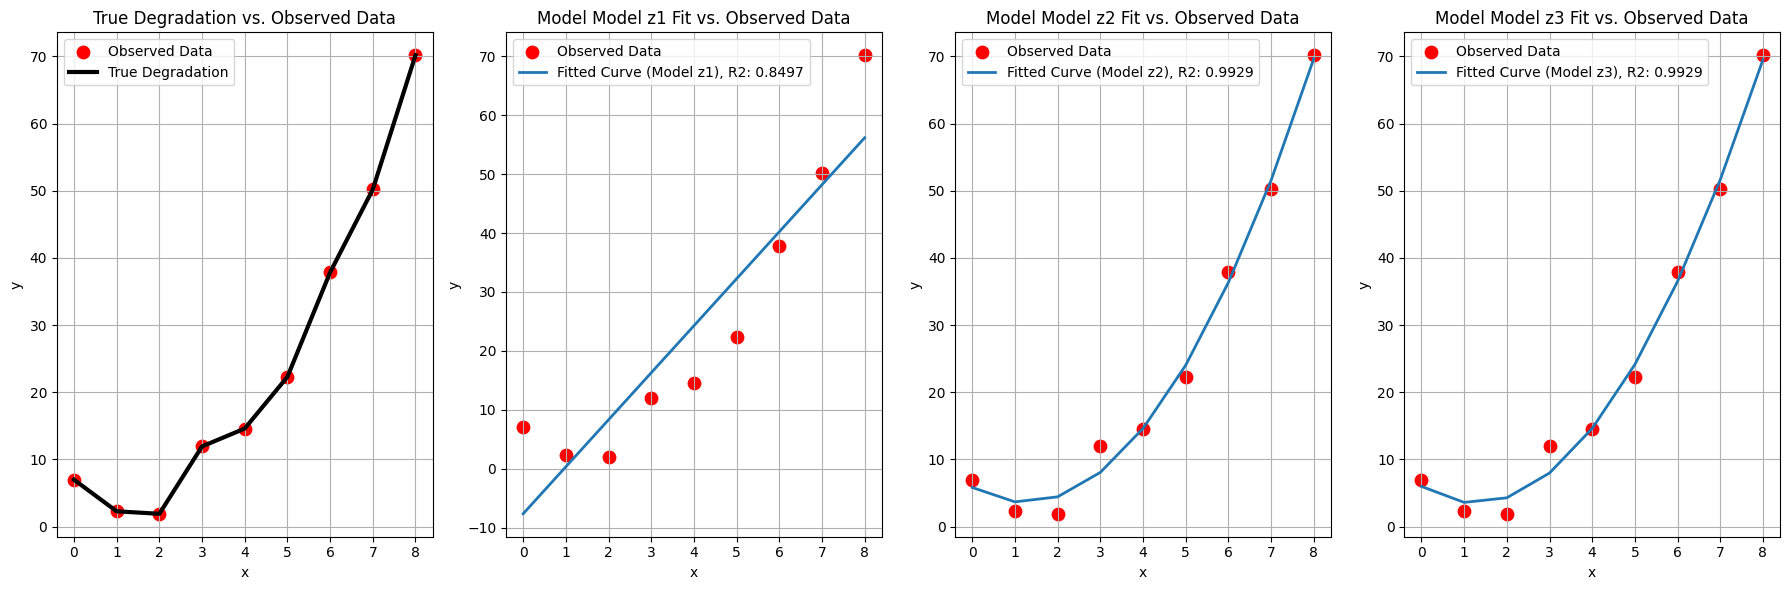

Model Model z1 coefficients: [0.         7.97933333]
Model Model z2 coefficients: [ 0.         -3.58741991  1.44584416]
Model Model z3 coefficients: [ 0.         -3.92991823  1.55937951 -0.00946128]


In [12]:
models = [
    ('Model z1', 1),
    ('Model z2', 2),
    ('Model z3', 3)
]

# Lists to store the coefficients for each model
coefficients_list = []

# Plotting the true degradation curve
plt.figure(figsize=(18, 6))
plt.subplot(1, 4, 1)
plt.scatter(x_observed_2, y_observed_2, color='red', label='Observed Data', s=80)
plt.plot(x_observed_2, y_observed_2, 'k', linewidth=3, label='True Degradation')
plt.xlabel('x')
plt.ylabel('y')
plt.title('True Degradation vs. Observed Data')
plt.legend()
plt.grid(True)

# Loop through the models and create comparison plots
for i, (model_name, degree) in enumerate(models):
    poly_features = PolynomialFeatures(degree=degree)
    X_poly = poly_features.fit_transform(x_observed_2.reshape(-1, 1))
    model = LinearRegression()
    model.fit(X_poly, y_observed_2)
    y_pred = model.predict(X_poly)

    # Calculate the R-squared value for the current model
    r2 = r2_score(y_observed_2, y_pred)

    # Create the subplot for the current model
    plt.subplot(1, 4, i + 2)
    plt.scatter(x_observed_2, y_observed_2, color='red', label='Observed Data', s=80)
    plt.plot(x_observed_2, y_pred, linewidth=2, label=f'Fitted Curve ({model_name}), R2: {r2:.4f}')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.title(f'Model {model_name} Fit vs. Observed Data')
    plt.legend()
    plt.grid(True)

    # Store the coefficients for the current model
    coefficients_list.append(model.coef_)

plt.tight_layout()
plt.show()

# Display the coefficients for each model
for i, (model_name, _) in enumerate(models):
    print(f'Model {model_name} coefficients: {coefficients_list[i]}')


In [15]:
coefficients_list[1]

array([ 0.        , -3.58741991,  1.44584416])

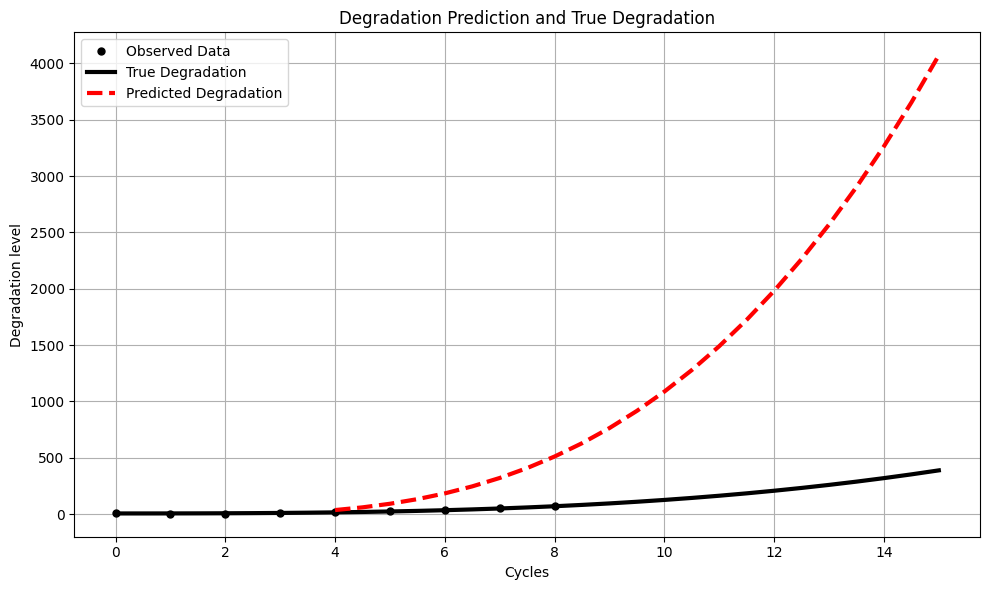

In [19]:
x_new = np.arange(4, 15.5, 0.5)

# Plotting the data and the predictions
plt.figure(figsize=(10, 6))
plt.plot(x_observed_2, y_observed_2, '.k', markersize=10, label='Observed Data')
plt.plot(x_true, true_values(x_true, theta_true), 'k', linewidth=3, label='True Degradation')
plt.plot(x_new, predicted_values(x_new, coefficients_list[1]), '--r', linewidth=3, label='Predicted Degradation')
plt.xlabel('Cycles')
plt.ylabel('Degradation level')
plt.title('Degradation Prediction and True Degradation')
plt.legend(loc='upper left')
plt.grid(True)
plt.tight_layout()

# # Customizing the plot
# plt.style.use('seaborn-pastel')
# plt.axhline(0, color='gray', linewidth=0.8, linestyle='--')
# plt.axvline(4, color='gray', linewidth=0.8, linestyle='--')
# plt.axvline(15, color='gray', linewidth=0.8, linestyle='--')

plt.show()

In [20]:
thres = 150
eol_values = calculate_eol(thres, coefficients_list[1])
print("The End of life is:", eol_values)

valid_solutions = [sol for sol in eol_values if sol >= 0]

currt = 4
while True:
    # Find the minimum positive RUL
    rul = min(valid_solutions) - currt

    print("Predicted RUL:", rul)

    # Check if RUL is zero or negative
    if rul <= 0:
        break

    # Update 'currt' for the next iteration
    currt += 1

The End of life is: [5.68792336524328]
Predicted RUL: 1.68792336524328
Predicted RUL: 0.687923365243278
Predicted RUL: -0.312076634756722


## __For Practice:__ Noisy data with different loading condition

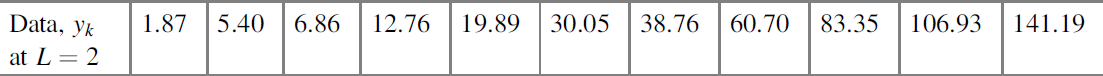

# Follow the link for the [Tutorial](https://drive.google.com/file/d/1Xm8_MRktLpFviIKO1Rho361p2M5UcauP/view?usp=sharing) video
